#A. Descargar y descomprimir los datos

In [ ]:
# Descargar el archivo profner.zip desde Zenodo
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1

# Descomprimir el archivo descargado
!unzip profner.zip?download=1

--2023-10-05 15:26:09--  https://zenodo.org/record/4563995/files/profner.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46552748 (44M) [application/octet-stream]
Saving to: ‘profner.zip?download=1.1’

profner.zip?downloa 100%[===================>]  44.40M  3.75MB/s    in 47s     

2023-10-05 15:26:57 (969 KB/s) - ‘profner.zip?download=1.1’ saved [46552748/46552748]

Archive:  profner.zip?download=1
replace profner/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#B. Funciones de carga y preparación de datos

In [ ]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


En este apartado voy a instalar y a importar todas las librerias que voyy a utilizar a lo largo del ejercicio, así como alguna descarga de archivos de estas:

In [ ]:
!pip install emosent-py
!pip install emoji_extractor
!pip install emoji
!pip install vaderSentiment
from textblob import TextBlob
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
!python -m spacy download es_core_news_sm
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('opinion_lexicon')
nltk.download('subjectivity')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')

!{sys.executable} -m pip install contractions

--2023-10-05 15:27:44--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip.1’

allzip.1                [  <=>               ]  94.61K   388KB/s    in 0.2s    

2023-10-05 15:27:45 (388 KB/s) - ‘allzip.1’ saved [96878]

Archive:  allzip
replace ESR_v1.0_format.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
2023-10-05 15:28:28.537946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 15:28:29.879861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!python -m spacy download es_core_news_sm

2023-10-05 15:28:52.541490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 15:28:53.788858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 21.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from tqdm.autonotebook import tqdm
tqdm.pandas()
import contractions
from emoji_extractor.extract import Extractor
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import es_core_news_sm

import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

from wordcloud import WordCloud
from imblearn.over_sampling import ADASYN

<ipython-input-5-8261e3c04ce0>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### 0.1 Funciones que se utilizarán

Funciones vistas en clase para trabajar con emojis, tokenizar los tweets, quitar signos de puntuación y palabras que no aportan, etc...

In [ ]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

In [ ]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

In [ ]:
# Calcula el sentimiento de los emojis de una lista utilizando el diccionario
# de emoji sentiment score generado previamente con la función load_emoji_sentiment()
# Se puede extraer el valor de positividad de los emojis con la option "positive"
# Se puede extraer el valor de neutralidad de los emojis con la option "neutral""
# Se puede extraer el valor de e negatividad de los emojis con la option "negative""

def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue
  return output

In [ ]:
# Eliminar los emojis de un texto. Esto es útil porque una vez extraido los emojis
# puede interesarnos tener un texto sin presencia de emojis para mejor análisis.
def clean_emoji(text):
    # Poner todos los comandos de http://www.unicode.org/Public/emoji/1.0/emoji-data.txt
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C'
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199'
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

In [ ]:
# Definir una función para contar las entidades por tipo
def count_entities(text):
    # Procesar el texto con spaCy
    document = nlp(text)

    # Inicializar contadores para diferentes tipos de entidades
    count_person = 0
    count_organization = 0
    count_location = 0

    # Iterar a través de las entidades nombradas y contarlas
    for named_entity in document.ents:
        if named_entity.label_ == "PERSON":
            count_person += 1
        elif named_entity.label_ == "ORG":
            count_organization += 1
        elif named_entity.label_ == "LOC":
            count_location += 1

    return count_person, count_organization, count_location

In [ ]:
# Función para eliminar espacios en blanco y convertir a minúsculas antes de tokenizar
def preprocess_and_tokenize(texto):
    # Eliminar espacios en blanco y convertir a minúsculas
    texto = texto.strip().lower()

    # Tokenizar el texto
    tweet_tokenizer = TweetTokenizer()
    tokens_list = tweet_tokenizer.tokenize(texto)

    return tokens_list

# Quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

def lematizar(tokens):
    # Unir los tokens en una cadena
    sentence = " ".join(tokens)

    # Aplicar el procesamiento de spaCy
    mytokens = nlp(sentence)

    # Lematizar los tokens
    mytokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]

    # Extraer el texto en una cadena
    return " ".join(mytokens)



In [ ]:
emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

Podemos textear que hemos obtenido un diccionario cuyas claves son los emojis presentes dentro de emoji sentiment score. Cada emoji tiene un score de negatividad, neutralidad, positividad y otros campos.

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
profner_path = "./profner/"
datos = get_profner_data(profner_path)

In [ ]:
datos

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train
...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid


## 2. Análisis exploratorio

En este apartado pretendemos realizar un análisis de los datos previo a la normalización de los mismos. Este análisis nos va a permitir extraer información relevante del dataset, así como posibles inconvenientes que serán solucionados llegado el caso.

Vamos a comenzar viendo las palabras más representativas utilzando WordCloud, aunque es muy probable que sean palabras con poco valor ya que no hemos realizado ningún depurado.

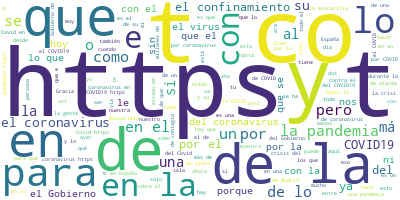

In [ ]:
# Une las frases
long_string = ','.join(list(datos['tweet_text'].values))
# Genera un objecto WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

* **Número de documentos y columnas:**

Vamos a mostrar el número de documentos, o lo que es lo mismo, el número de filas del data frame:

In [ ]:
print("Tenemos un conjunto de {} documentos".format(len(datos)))
print("El dataframe tiene {} columnas".format(datos.shape[1]))

Tenemos un conjunto de 8000 documentos
El dataframe tiene 4 columnas


* **Número de documentos duplicados:**

Despues, comprobamos y eliminamos las filas con algún valor vacío (NA) y quitaremos los duplicados.

In [ ]:
print("Existen {} noticias duplicadas".format(np.sum(datos.duplicated(subset=["tweet_id"]))))
# Quitaremos esos duplicados
datos = datos.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} noticias".format(datos.shape[0]))

Existen 0 noticias duplicadas
Despues de quitar duplicados tenemos un conjunto de 8000 noticias


Comprobaramos que no hayan quedado Nulls en ningunas de las dos columnas del dataset

In [ ]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos.isnull())[0],
                                                                                                        np.sum(datos.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


* **Número de documentos por cada clase:**

Contamos el número de elementos de cada clase, esto se hace muy fácil con un groupby de la columna 'positive' y un conteo posterior. También se puede hacer con un value_counts sobre la serie de la etiqueta.

In [ ]:
print(datos["label"].value_counts())

# Número de elementos de cada clase:
datos.groupby(['label']).count()


0    6130
1    1870
Name: label, dtype: int64


,tweet_id,tweet_text,set
label,,,
0,6130,6130,6130
1,1870,1870,1870


Datos muy poco balanceados, tal y como se menciona en el foro, por lo que vamos a tener que hacer un balanceo artificial usando Imbalanced-learn

* **Distribución de la longitud de los tweet en caracteres:**

Para seguir con el análisis exploratorio, vamos a hacer un cálculo típico: la longitud de cada uno de los textos de los documentos para despues dibujar su histograma.

Comenzamos creando las columnas que van a almacenar las longitud en caracteres y en tokens de los documentos del corpus:

In [ ]:
datos["char_len"] = datos["tweet_text"].apply(lambda x: len(x))

<ipython-input-21-31a2b201b783>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos[datos["label"]==0].char_len, hist=True, label="NO professions")
<ipython-input-21-31a2b201b783>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos[datos["label"]==1].char_len, hist=True, labe

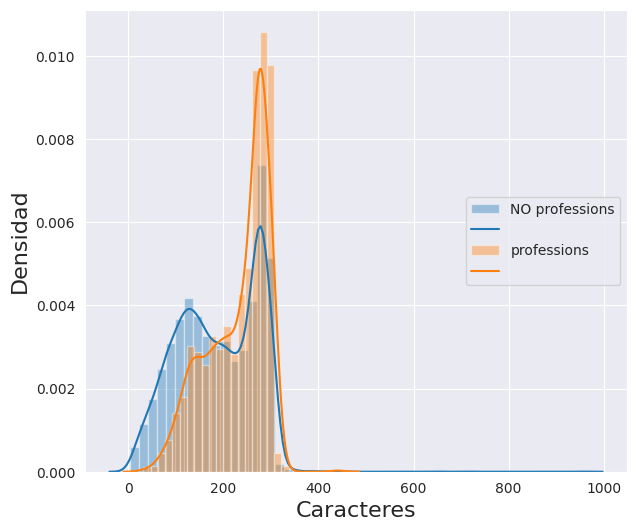

In [ ]:
fig = plt.figure(figsize=(7,6))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(datos[datos["label"]==0].char_len, hist=True, label="NO professions")
plt2 = sns.distplot(datos[datos["label"]==1].char_len, hist=True, label="professions")
plt.legend(labels=['NO professions',"",'professions',""], loc = 5)

# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()


El histograma para professions se encuentra más concentrado a la derecha, lo que implica que el número de carácteres puede estar relacionado con los tweets que son de profesiones.

## 3. Preprocesado y Normalización

### Emojis
En primer luigar vamos a trabajar con los emojis.

Vamos a extraerlos con una función lambda aplicando la función extract_emojis() definida anteriormente en el dataframe

In [ ]:
datos["emoji_list"] = datos["tweet_text"].apply(lambda x: extract_emojis(x))

Vemos que nos ha guardado los emojis en la columna "emoji_list":

In [ ]:
datos["emoji_list"]

0        []
1        []
2        []
3        []
4        []
       ... 
7995     []
7996     []
7997     []
7998    [🤮]
7999    [🤣]
Name: emoji_list, Length: 8000, dtype: object

A continuación, se calcula un score de sentimiento a los emojis asociados a cada tweet. Si no hay emojis, estos scores serán cero.
Para calcular esto lo haremos de nuevo con funciones lambda aplicando la función get_emoji_sentiment() anteriormente generada:

In [ ]:
datos["sent_emoji_pos"] = datos["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "positive"))
datos["sent_emoji_neu"] = datos["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
datos["sent_emoji_neg"] = datos["emoji_list"].apply(lambda x: get_emoji_sentiment(x, "negative"))

In [ ]:
datos["sent_emoji_pos"].describe()

count    8000.000000
mean        0.116440
std         0.327388
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.968292
Name: sent_emoji_pos, dtype: float64

### Preprocesar textos
Vamos a realizar los preprocesados indicados antes.

Despues del proceso de extracción de emojis, los quitaremos de nuestros textos porque no nos serán útiles.

In [ ]:
# Quitar emojis de los textos
datos["tweet_text_processed"] = datos["tweet_text"].apply(lambda x: clean_emoji(x))

Vamos a crear también entidades por si sirve de algo:

In [ ]:
# Aplicar la función a la columna 'tweet_text_processed' y crear nuevas columnas
datos[['person_entities', 'organization_entities', 'location_entities']] = datos['tweet_text_processed'].apply(lambda x: pd.Series(count_entities(x)))

Despues tokenizamos el texto, y trabajaremos en limpiar los tokens que no son útiles en este problema para reducir dimensionalidad

In [ ]:
# Aplicar la función de preprocesamiento y tokenización a la columna "tweet_text_processed"
datos["tokenized"] = datos["tweet_text_processed"].apply(lambda x: preprocess_and_tokenize(x))

Procesamos los tokens:

In [ ]:
# Quitar stopwords
datos["tokenized_clean"] = datos["tokenized"].apply(lambda x: quitar_stopwords(x))
# Quitamos los símbolos de puntuación
datos["tokenized_clean"] = datos["tokenized_clean"].apply(lambda x: quitar_puntuacion(x))
# Lematizamos
datos["lematizacion"] = datos["tokenized_clean"].apply(lambda x: lematizar(x))

## Spanish Emotion Lexicon (SEL)


Descargamos los datos de Spanish Emotion Lexicon de la web de [Grigori Sidorov](https://www.cic.ipn.mx/~sidorov/#SEL)

In [ ]:
url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

La categoría "Alegría" y "Sorpresa" se mapearán a "positive" y el resto a "negative":

In [ ]:
dicc_mapping = {"Alegría":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsión":"negative"}

sel_lexicon["Categoría"] = sel_lexicon["Categoría"].map(dicc_mapping)

In [ ]:
positive_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="negative"][' PFA']))

In [ ]:
def calculate_sentiment(frase, positive_words, negative_words):
  """
  Función para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en español. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extraídas de SEL

  Out:
    Sentiment score
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0

  return score

In [ ]:
# Crear una nueva columna llamada "sentiment_score" que almacenará los puntajes de sentimiento
datos["sentiment_score"] = datos["lematizacion"].apply(lambda x: calculate_sentiment(x, positive_words, negative_words))

Ahora que ya hemos hecho el preprocesado, vamos a echar un vistazo a nuestro dataframe y a las palabras clave:

In [ ]:
datos

,tweet_id,tweet_text,label,set,char_len,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,person_entities,organization_entities,location_entities,tokenized,tokenized_clean,lematizacion,sentiment_score
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0.0,0.0,0.0,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,2,2,"[china, :, libera, una, pandemia, ee.uu, :, li...","[china, libera, pandemia, libera, ovnis, argen...",chino libera pandemia libera ovnis argentino l...,0.000
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0.0,0.0,0.0,San Francisco (EEUU) hace 100 años tras vivir ...,0,0,2,"[san, francisco, (, eeuu, ), hace, 100, años, ...","[san, francisco, eeuu, hace, 100, años, tras, ...",san francisco eeuu hacer 100 año tras vivir pa...,0.630
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0.0,0.0,0.0,Porfi poneos la mascarilla o tendremos 28 nuev...,0,0,0,"[porfi, poneos, la, mascarilla, o, tendremos, ...","[porfi, poneos, mascarilla, 28, nuevas, cancio...",porfi poneo mascarilla 28 nuevo canción artist...,0.000
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train,225,[],0.0,0.0,0.0,El nuevo „covid normas y reglas recibimiento“ ...,0,0,2,"[el, nuevo, „, covid, normas, y, reglas, recib...","[nuevo, covid, normas, reglas, recibimiento, c...",nuevo covid norma regla recibimiento comercio ...,0.000
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train,138,[],0.0,0.0,0.0,Si el confinamiento ha dejado algo tocada tu e...,0,0,0,"[si, el, confinamiento, ha, dejado, algo, toca...","[si, confinamiento, dejado, tocada, estabilida...",si confinamiento dejado tocado estabilidad men...,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid,149,[],0.0,0.0,0.0,#LoMásLeído | Los nuevos infectados de coronav...,0,0,1,"[#lomásleído, |, los, nuevos, infectados, de, ...","[nuevos, infectados, coronavirus, multiplican,...",nuevo infectado coronavirus multiplicar casi 2...,-0.729
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid,138,[],0.0,0.0,0.0,Ayuso adjudica a dedo un contrato de 30.000 eu...,0,0,0,"[ayuso, adjudica, a, dedo, un, contrato, de, 3...","[ayuso, adjudica, dedo, contrato, euros, hacer...",ayuso adjudico dedo contrato euros hacer vídeo...,0.000
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid,280,[],0.0,0.0,0.0,Meses encerrados. Se puede viajar a otras prov...,0,0,0,"[meses, encerrados, ., se, puede, viajar, a, o...","[meses, encerrados, puede, viajar, provincias,...",mes encerrado poder viajar provincia ir restau...,-0.729
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid,159,[🤮],0.0,0.0,0.0,El gobierno prohíbe por ley lis despidos duran...,0,0,0,"[el, gobierno, prohíbe, por, ley, lis, despido...","[gobierno, prohíbe, ley, lis, despidos, crisis...",gobierno prohíbir ley lis despido crisis coron...,-0.696


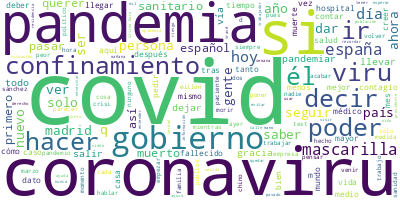

In [ ]:
# Une las frases
long_string = ','.join(list(datos['lematizacion'].values))
# Genera un objecto WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

## 4. Vectorización

Vamos a vectorizar los datos ya lematizados en monomios, binomios y trinomios utilizando Tfid:

In [ ]:
# BoW Features
vectorizador = TfidfVectorizer(min_df=0.001, ngram_range = (1,3))
vector_data = vectorizador.fit_transform(datos["lematizacion"])

## 5. Entrenamiento y evaluación de modelos

Primero vemos que variables podemos utilizar para acompañar a los vectores de datos como regresores para los modelos de clasificación. He cogido todas las numéricas, aunque es posible que no tengan relevancia.

In [ ]:
extra_features = datos[['sent_emoji_pos', 'sent_emoji_neu', 'sent_emoji_neg','sentiment_score', 'char_len', 'person_entities', 'organization_entities', 'location_entities']]

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Sin embargo, antes de hacer esta unión divido los datos en train y test usando la variable "set" para diferenciar:

In [ ]:
# Filtrar los datos para obtener solo los registros etiquetados como "train" o "valid"
train_data = datos[datos["set"] == "train"]
test_data = datos[datos["set"] == "valid"]

# Definir X e y para el conjunto de entrenamiento
y_train = train_data["label"].values.astype(np.float32)
X_train = sp.sparse.hstack((vector_data[:len(train_data)], train_data[extra_features.columns].values), format='csr')

# Definir X e y para el conjunto de prueba
y_test = test_data["label"].values.astype(np.float32)
X_test = sp.sparse.hstack((vector_data[len(train_data):], test_data[extra_features.columns].values), format='csr')

Balanceo de los datos usando el algoritmo ADASYN (creo que puede ser útil ya que genera tmb datos random para compensar):

In [ ]:
# Crear una instancia de ADASYN con la estrategia de sobremuestreo
ada = ADASYN(sampling_strategy={1: 2300}, random_state=42)
# Aplicar el sobremuestreo a tus datos
X_train_re, y_train_re = ada.fit_resample(X_train, y_train)

# Verificar los conteos después del sobremuestreo
unique, counts = np.unique(y_train_re, return_counts=True)
counts_dict = dict(zip(unique, counts))

print("Después del sobremuestreo, conteo de clases:")
print(counts_dict)

print(X_train_re.shape)
print(X_test.shape)

Después del sobremuestreo, conteo de clases:
{0.0: 4607, 1.0: 2569}
(7176, 2685)
(2000, 2685)


In [ ]:
#Lo junto todo para hacer la función de model-evaluation para comparar modelos
X = np.vstack((X_train_re.toarray(), X_test.toarray()))
y = np.concatenate((y_train_re, y_test))

###Decision de modelo de ML a utilizar

En primer lugar se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados.

La función hace un KFold y evalua diferentes modelos con una métrica de evaluación:

In [ ]:
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación y comprobar los que clasifican mejor:

In [ ]:
# Definir los modelos
models = [
    ("Logistic", LogisticRegression(random_state=30)),
    ("Decision Tree", DecisionTreeClassifier(random_state=30)),
    ("GaussianNB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=30)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=30))
]

evaluation_score = "accuracy"
model_evaluation(models,  evaluation_score, X, y)

Metric: accuracy , KFold 
Logistic: 0.802638 (0.014605) 
Metric: accuracy , KFold 
Decision Tree: 0.850914 (0.012982) 
Metric: accuracy , KFold 
GaussianNB: 0.700197 (0.014025) 
Metric: accuracy , KFold 
Random Forest: 0.903660 (0.009556) 


KeyboardInterrupt: ignored

In [ ]:

rf_model = RandomForestClassifier()
# Entrenar los modelos con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Evaluar los modelos utilizando validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=evaluation_score)

# Calcular la precisión promedio de validación cruzada para cada modelo
rf_mean_accuracy = rf_scores.mean()

print("Accuracy promedio de RandomForestClassifier:", rf_mean_accuracy)

Accuracy promedio de RandomForestClassifier: 0.8826666666666666


### Ver variables más importantes

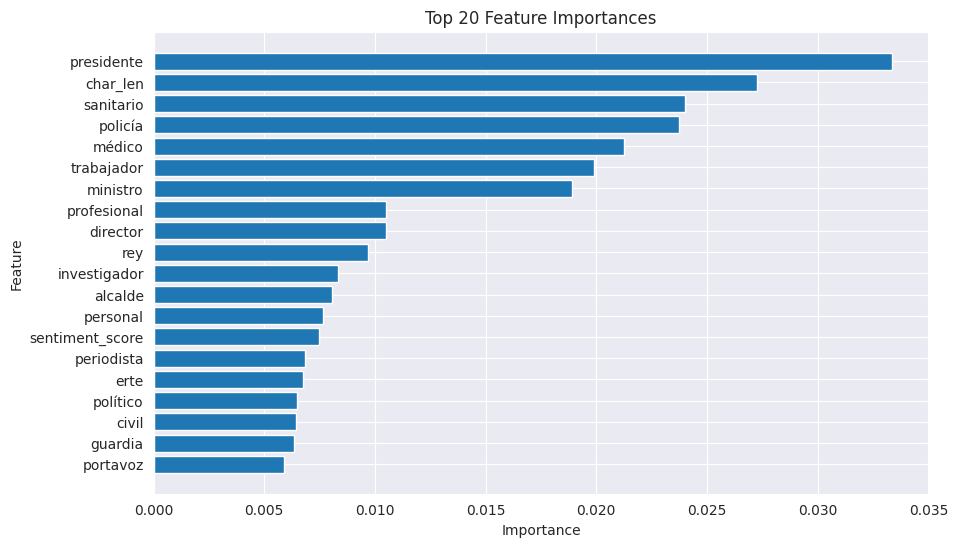

In [ ]:
# Obtener las características reales (columnas) del vectorizador y las características adicionales
vectorizer_features = vectorizador.get_feature_names_out()
all_features = list(vectorizer_features) + list(extra_features.columns)

# Obtener las importancias de las características del modelo RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para las características y sus importancias
feat_importances = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})

# Ordenar las características por importancia en orden descendente
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Visualizar las características más importantes en un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'][:20], feat_importances['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las características más importantes en la parte superior
plt.show()


In [ ]:
feat_importances

,Feature,Importance
1977,presidente,0.033341
2681,char_len,0.027281
2273,sanitario,0.023990
1926,policía,0.023754
1662,médico,0.021240
...,...,...
1645,muerto residencia,0.000000
2416,tapar,0.000000
1687,news,0.000000
2578,ventana,0.000000


Vamos a probar a tramificar char len a ver si mejoramos el scoring (voy a hacerlo a ojo a partir d la gráfica de distribución del análisis exploratorio)

In [ ]:
# Definir los límites de los rangos
bins = [0, 70, 200, 350, 500, float('inf')]  # Los límites deben incluir +infinito para el último rango

# Definir los nombres de las columnas ficticias
labels = ['char_len_0_70', 'char_len_70_200', 'char_len_200_350', 'char_len_350_500', 'char_len_500+']

# Crear las columnas ficticias
dummies = pd.get_dummies(pd.cut(datos['char_len'], bins=bins, labels=labels))

# Concatenar las columnas ficticias al DataFrame original
datos = pd.concat([datos, dummies], axis=1)



In [ ]:
extra_features = datos[['sent_emoji_pos', 'sent_emoji_neu', 'sent_emoji_neg', 'sentiment_score', 'char_len_0_70', 'char_len_70_200', 'char_len_200_350', 'char_len_350_500', 'char_len_500+', 'person_entities', 'organization_entities', 'location_entities']]

Repetimos el proceso de entrenamiento:

In [ ]:
# Filtrar los datos para obtener solo los registros etiquetados como "train" o "valid"
train_data = datos[datos["set"] == "train"]
test_data = datos[datos["set"] == "valid"]

# Definir X e y para el conjunto de entrenamiento
y_train = train_data["label"].values.astype(np.float32)
X_train = sp.sparse.hstack((vector_data[:len(train_data)], train_data[extra_features.columns].values), format='csr')

# Definir X e y para el conjunto de prueba
y_test = test_data["label"].values.astype(np.float32)
X_test = sp.sparse.hstack((vector_data[len(train_data):], test_data[extra_features.columns].values), format='csr')

Balanceo de los datos usando el algoritmo ADASYN (creo que puede ser útil ya que genera tmb datos random para compensar):

In [ ]:
# Crear una instancia de ADASYN con la estrategia de sobremuestreo
ada = ADASYN(sampling_strategy={1: 2300}, random_state=42)
# Aplicar el sobremuestreo a tus datos
X_train_re, y_train_re = ada.fit_resample(X_train, y_train)

# Verificar los conteos después del sobremuestreo
unique, counts = np.unique(y_train_re, return_counts=True)
counts_dict = dict(zip(unique, counts))

print("Después del sobremuestreo, conteo de clases:")
print(counts_dict)

print(X_train_re.shape)
print(X_test.shape)

Después del sobremuestreo, conteo de clases:
{0.0: 4607, 1.0: 2494}
(7101, 2689)
(2000, 2689)


In [ ]:
#Lo junto todo para hacer la función de model-evaluation para comparar modelos
X = np.vstack((X_train_re.toarray(), X_test.toarray()))
y = np.concatenate((y_train_re, y_test))

In [ ]:
# Definir los modelos y ver su precisión
models = [
    ("Logistic", LogisticRegression(random_state=30)),
    ("Decision Tree", DecisionTreeClassifier(random_state=30)),
    ("GaussianNB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=30)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=30))
]

evaluation_score = "accuracy"
model_evaluation(models,  evaluation_score, X, y)

Metric: accuracy , KFold 
Logistic: 0.850566 (0.010596) 
Metric: accuracy , KFold 
Decision Tree: 0.851004 (0.013088) 
Metric: accuracy , KFold 
GaussianNB: 0.624217 (0.013759) 
Metric: accuracy , KFold 
Random Forest: 0.902758 (0.007522) 
Metric: accuracy , KFold 
Gradient Boosting: 0.851005 (0.010174) 


([array([0.84961581, 0.84505495, 0.86483516, 0.83626374, 0.84505495,
         0.85054945, 0.83736264, 0.85934066, 0.87032967, 0.84725275]),
  array([0.85949506, 0.85054945, 0.86043956, 0.85054945, 0.85274725,
         0.83406593, 0.85384615, 0.86703297, 0.86043956, 0.82087912]),
  array([0.62678375, 0.61208791, 0.65714286, 0.62637363, 0.63406593,
         0.63076923, 0.60879121, 0.61978022, 0.61098901, 0.61538462]),
  array([0.90340285, 0.91318681, 0.9021978 , 0.89010989, 0.91318681,
         0.89010989, 0.90769231, 0.9010989 , 0.9032967 , 0.9032967 ]),
  array([0.85400659, 0.85934066, 0.86043956, 0.83626374, 0.84065934,
         0.85714286, 0.85604396, 0.85274725, 0.86153846, 0.83186813])],
 ['Logistic',
  'Decision Tree',
  'GaussianNB',
  'Random Forest',
  'Gradient Boosting'])

Una vez vistos diferentes modelos y su evaluación, nos quedamos con el Random Forest y el Gradient Boosting ya que es el que mejor puntuación nos da.

Definimos las variables para hacer una grid_searc:

Vamos a entrenar el grid_search para obtener el mejor parámetro para nuestro conjunto de datos.

In [ ]:
# Definir los modelos con los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear los objetos GridSearchCV para RandomForestClassifier y GradientBoostingClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=30), param_grid_rf, cv=5, scoring=evaluation_score)

# Realizar la búsqueda de hiperparámetros
grid_result_rf = grid_search_rf.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y puntajes
print("Mejores hiperparámetros para RandomForestClassifier: ", grid_result_rf.best_params_)
print("Mejor accuracy para RandomForestClassifier: %f" % grid_result_rf.best_score_)

Mejores hiperparámetros para RandomForestClassifier:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mejor accuracy para RandomForestClassifier: 0.881000


Entrenamos el modelo con los resultados ofrecidos por la grid_search:

In [ ]:
# Crear instancias de los modelos con los mejores hiperparámetros
rf_model = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=200, random_state=30)
# Entrenar los modelos con los datos de entrenamiento
rf_model.fit(X_train, y_train)
# Evaluar los modelos utilizando validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=evaluation_score)
# Calcular la precisión promedio de validación cruzada para cada modelo
rf_mean_accuracy = rf_scores.mean()

print("Accuracy promedio de RandomForestClassifier:", rf_mean_accuracy)

Accuracy promedio de RandomForestClassifier: 0.881
Accuracy promedio de GradientBoostingClassifier: 0.8789999999999999


Vamos a ver como funciona el modelo haciendo el predict del test y mostrando la matriz de confusión y el classifciation_Report:

In [ ]:
# Predecir utilizando RandomForestClassifier
y_pred_rf = rf_model.predict(X_test)

# Evaluar los modelos RandomForestClassifier y GradientBoostingClassifier
print("Evaluación de RandomForestClassifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Evaluación de RandomForestClassifier:
[[1486   37]
 [ 198  279]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      1523
         1.0       0.88      0.58      0.70       477

    accuracy                           0.88      2000
   macro avg       0.88      0.78      0.82      2000
weighted avg       0.88      0.88      0.87      2000



Una vez analizada la matriz de confusión, vemos que los algoritmos clasificadores aciertan un 88% de veces con los tweets de profesiones.